<a href="https://colab.research.google.com/github/samanthasosome/GW-noise-ML-classification/blob/main/create_glitch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/andrew-lundgren/antiglitch.git

fatal: destination path 'antiglitch' already exists and is not an empty directory.


In [ ]:
pip install antiglitch/

Processing ./antiglitch
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for antiglitch: filename=antiglitch-0.0.1-py3-none-any.whl size=6278 sha256=d1f1ca18e131a20a5ad50b465a036dd36a9a724aee32605a4aa61d82a4a1b87c
  Stored in directory: /tmp/pip-ephem-wheel-cache-gmn9wizq/wheels/f6/a3/1d/6574a82203c59e0720fd56275f7c6b3d7f46e16a07571c0382
Successfully built antiglitch
  Attempting uninstall: antiglitch
    Found existing installation: antiglitch 0.0.1
    Uninstalling antiglitch-0.0.1:
      Successfully uninstalled antiglitch-0.0.1


In [ ]:
from antiglitch import utils
utils.datadir = '/content/drive/MyDrive/Colab Notebooks/Project Notebooks/one blip'

In [ ]:
from antiglitch.utils import Snippet
import matplotlib.pyplot as plt

In [6]:
snip = Snippet('L1','blip',0)

/usr/local/lib/python3.10/dist-packages/antiglitch/utils.py:30: RuntimeWarning: divide by zero encountered in power
  invasd = ((4096.*npz['psd'])**-0.5)[:4097]


In [7]:
inf = {'amp_r': 200.,
       'amp_i': 0.,
       'f0': 30.,
       'gbw': 4.,
       'time': 0.}

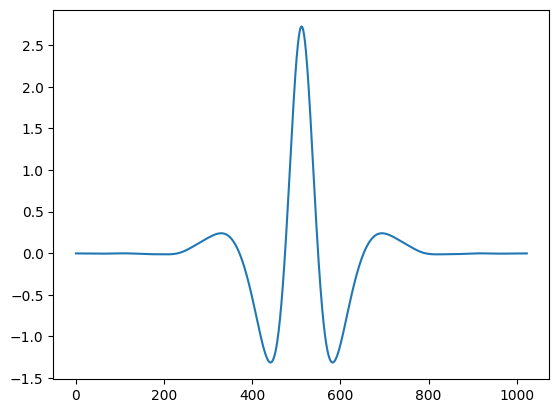

In [8]:
snip.set_infer(inf)
plt.plot(snip.glitch)

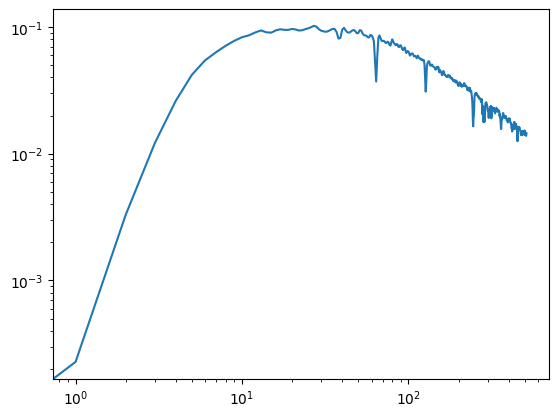

In [9]:
plt.loglog(snip.invasd)

In [10]:
from numpy.random import default_rng
rng = default_rng(seed=7678735)

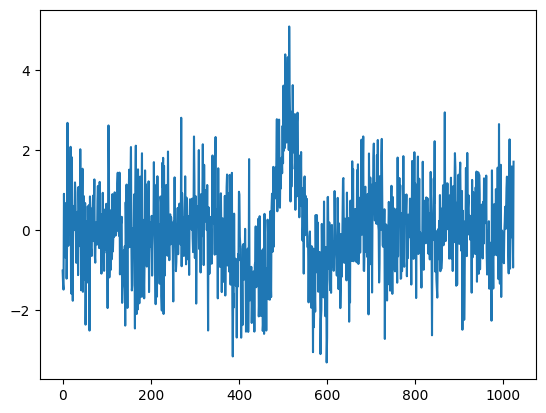

In [11]:
plt.plot(snip.glitch+rng.normal(size=len(snip.whts)))

In [ ]:
from antiglitch import model

In [ ]:
mle = model.create_mle_model(model.freqs,

In [ ]:
mle?

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ERROR: Invalid requirement: '/content/drive/MyDrive/Colab'
Hint: It looks like a path. File '/content/drive/MyDrive/Colab' does not exist.


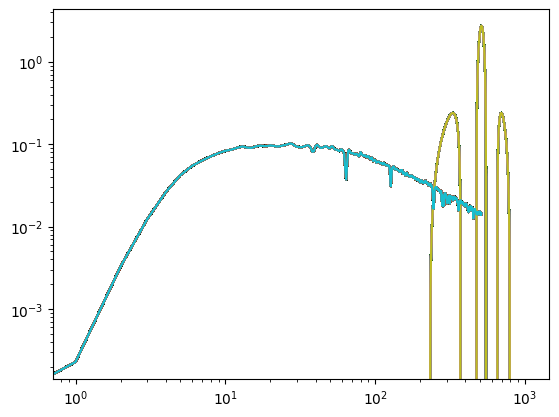

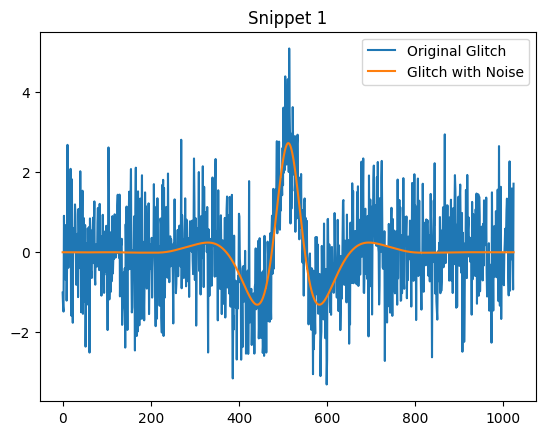

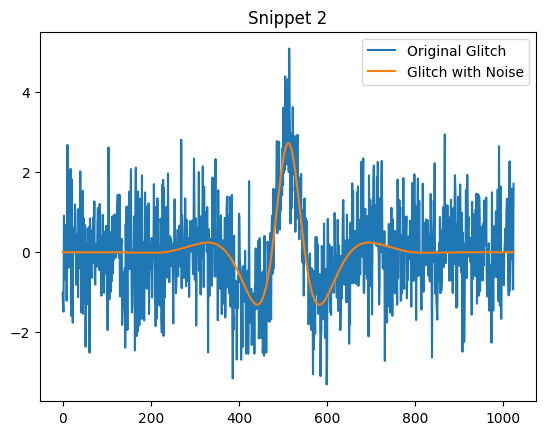

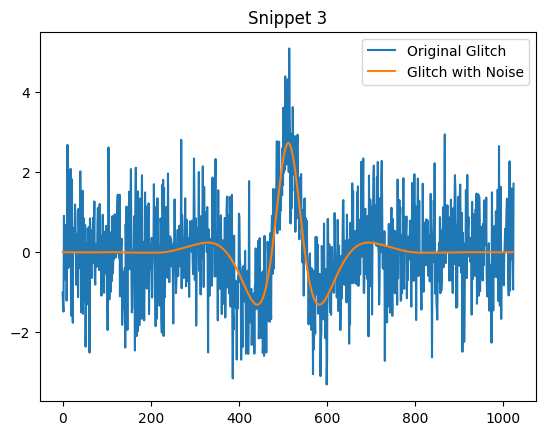

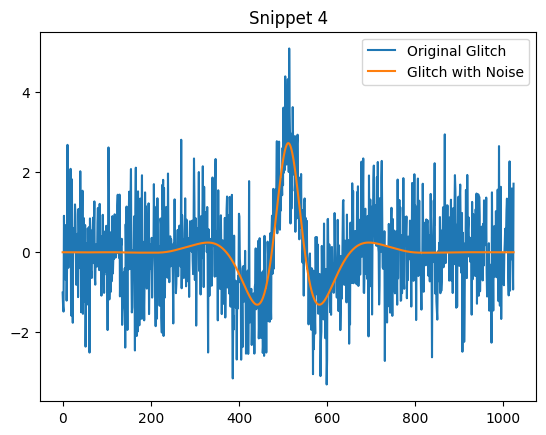

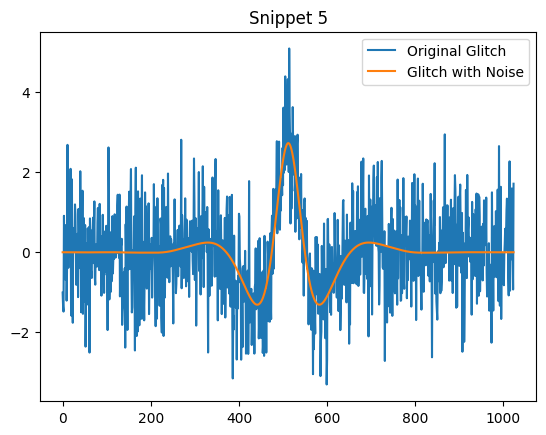

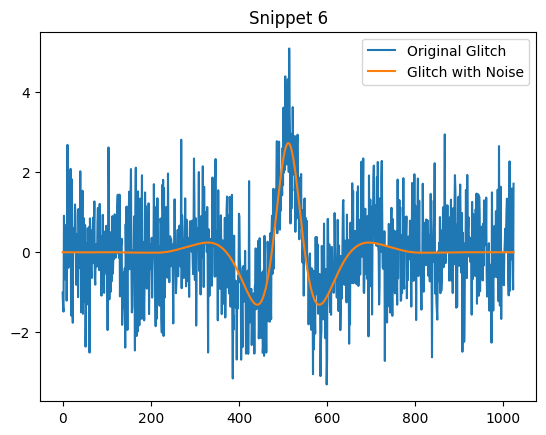

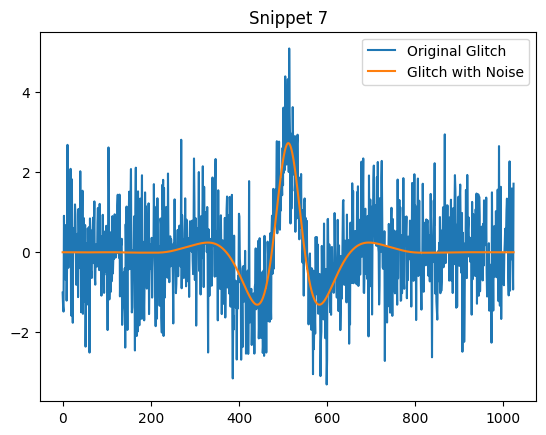

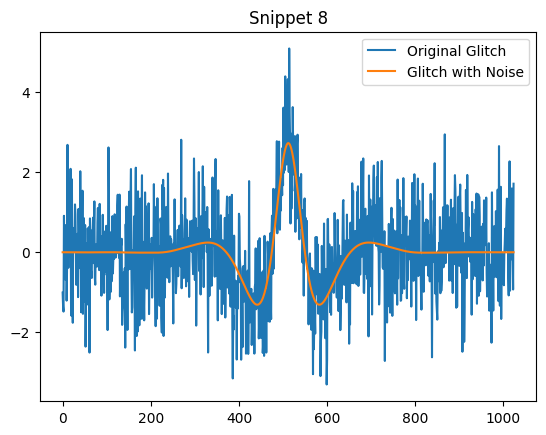

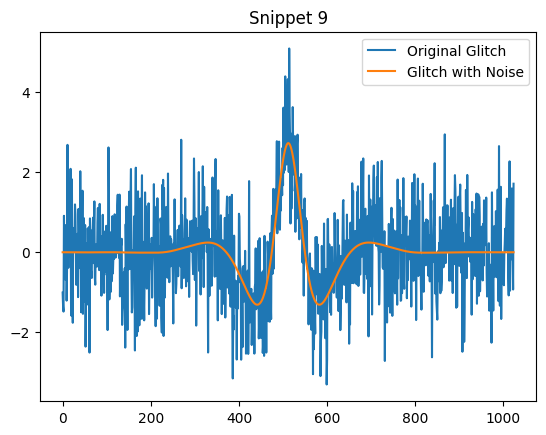

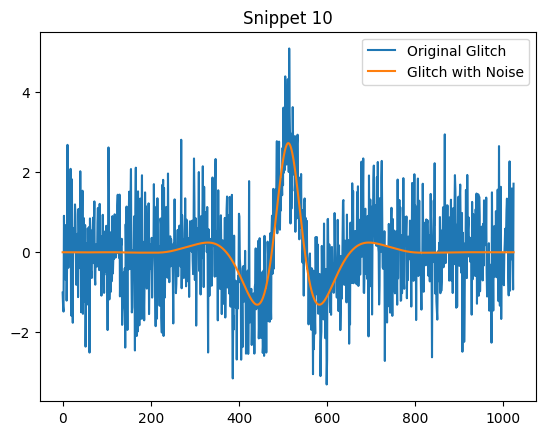

In [13]:
from google.colab import drive
drive.mount('/content/drive')

# Install the antiglitch package from your local directory
!pip install /content/drive/MyDrive/Colab Notebooks/Project Notebooks/one blip

from antiglitch.utils import Snippet
import matplotlib.pyplot as plt

# Adjust the data directory to point to your local directory on Google Drive
from antiglitch import utils
utils.datadir = '/content/drive/MyDrive/Colab Notebooks/Project Notebooks/data/'


# Create a list to store the generated snippets
snippets = []

# Create 1000 instances of glitch with noise
for _ in range(1000):
    # Create a new Snippet instance
    snip = Snippet('L1', 'blip', 0)

#snip = Snippet('L1', 'blip', 0)

    inf = {'amp_r': 200.,
          'amp_i': 0.,
          'f0': 30.,
          'gbw': 4.,
          'time': 0.}

    snip.set_infer(inf)

    plt.plot(snip.glitch)
    plt.loglog(snip.invasd)

    # Generating random noise
    rng = default_rng(seed=7678735)
    noise = rng.normal(size=len(snip.whts))

    # Adding noise to the glitch
    glitch_with_noise = snip.glitch + noise

    # Storing the snippet and glitch with noise
    snippets.append((snip, glitch_with_noise))

# Plotting the first 10 instances of glitch with noise
for i, (snip, glitch_with_noise) in enumerate(snippets[:10]):
    plt.figure()
    plt.plot(glitch_with_noise)
    plt.plot(snip.glitch)
    plt.title(f'Snippet {i+1}')
    plt.legend(['Original Glitch', 'Glitch with Noise'])
    plt.show()

In [15]:
import os
import numpy as np


# Create a directory to store the .npz files if it doesn't exist
directory = '/content/drive/MyDrive/Colab Notebooks/Project Notebooks/1000blips'
if not os.path.exists(directory):
    os.makedirs(directory)

# Save each glitch with noise as a .npz file
for i, (snip, glitch_with_noise) in enumerate(snippets):
    filename = f'glitch_{i+1}.npz'
    filepath = os.path.join(directory, filename)
    np.savez(filepath, glitch_with_noise=glitch_with_noise)
